# Вопросы по вероятностным методам

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Статистики-распределений" data-toc-modified-id="Статистики-распределений-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Статистики распределений</a></span></li><li><span><a href="#Многомерное-нормальное-распределение" data-toc-modified-id="Многомерное-нормальное-распределение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Многомерное нормальное распределение</a></span></li><li><span><a href="#Условное-математическое-ожидание" data-toc-modified-id="Условное-математическое-ожидание-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Условное математическое ожидание</a></span></li></ul></div>

In [1]:
# Imports
import numpy as np
import scipy.stats as stats
np.random.seed(42)

import matplotlib.pyplot as plt

In [2]:
# Styles
import matplotlib
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['lines.linewidth'] = 1.5
matplotlib.rcParams['lines.markersize'] = 4
cm = plt.cm.tab10  # Colormap

import seaborn
seaborn.set_style('whitegrid')

In [3]:
# import warnings
# warnings.filterwarnings('ignore')

# %config InlineBackend.figure_formats = ['pdf']
# %config Completer.use_jedi = False

---

## Статистики распределений

1. **Вопрос**: Дано нормальное распределение. Укажите моду, медиану и математическое ожидание. Что изменится, если добавить ещё одно, смещённое нормальное распределение?

1. **Вопрос**: Пусть одна из двух независимых случайных величин имеет дискретное, а вторая &mdash; абсолютно непрерывное распределение. Какое распределение будет иметь их сумма? \
   **Ответ**: Пусть величина $\xi$ имеет таблицу распределения $Р(\xi = a_i) = p_i$, а $\eta$ имеет плотность распределения $f_\eta(x)$, и эти величины независимы.
   Тогда $\xi+\eta$ имеет плотность распределения $f_{\xi+\eta}(x) = \sum p_i f_\eta (x - a_i)$. (Чернова, стр. 85)

In [4]:
N = int(2e5)
n_max, A = 2, 3
X1 = np.random.normal(loc=0, scale=1, size=N)
# X2 = np.random.normal(loc=3, scale=1, size=N)
X2 = A*np.random.randint(0, n_max, N)

x = np.linspace(-3, 6, num=1001)
Y = np.zeros_like(x)
for i in range(0, n_max):
    Y += 1./n_max * stats.norm.pdf(x, loc=A*i, scale=1)

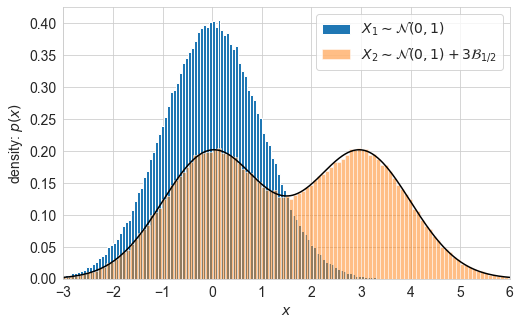

In [5]:
bins = 150
fig = plt.figure(figsize=(8, 5))
ax = plt.subplot(1,1,1)
# plt.title('Одномерные нормальные распределения')
plt.hist(X1, bins=bins, density=True, label='$X_1 \sim \mathcal{{N}}(0,1)$')
plt.hist(X1+X2, bins=bins, density=True, alpha=0.5,
         label=f'$X_2 \sim \mathcal{{N}}(0,1) + {A}\mathcal{{B}}_{{1/2}}$')
plt.plot(x, Y, c='k')

plt.xlabel('$x$')
plt.ylabel('density: $p(x)$')
plt.xlim([-3, 6])
plt.legend()
plt.show()

2. **Вопрос:** Пусть $\xi \sim \mathcal{{N}}(0,\sigma^2)$. Найти $\rho(\xi, \xi^n)$. \
   **Ответ:** $\rho = 0$ для чётных $n$ и $\rho = \dfrac{n!!}{\sqrt{(2n-1)!!}}$ для нечётных $n$.

---

## Многомерное нормальное распределение

1. **Вопрос:** Пусть случайный вектор $\xi$ имеет многомерное нормальное распределение $\mathcal{N}(\mu, \Sigma)$. Как вектор $\xi$ преобразовать в вектор $\eta$, состоящий из независимых стандартных нормальных случайных величин? \
   **Ответ:** $\eta = L^{-1} (\xi - \mu)$, где $\Sigma = L L^\top$.
   
1. **Вопрос:** Умножение на ортогональную матрицу, не меняет совместного распределения координат *стандартного нормального вектора*. А что можно с помощью поворота сделать с произвольным нормальным вектором? \
   **Ответ:** При повороте $Q$ матрица ковариаций $\Sigma$ преобразуется к виду $Q\Sigma Q^\top$. Однако симметричную положительно определённую матрицу можно ортогональными преобразованиями привести к диагональному виду. Вот почему любой нормальный вектор $\xi$ подходящим поворотом $\eta = Q \xi$ можно превратить в вектор с независимыми, но не обязательно одинаково распределёнными координатами.
   
1. **Вопрос:** Из некоррелированности случайных величин следует независимость? Привести контрпримеры. \
   **Ответ:** Случайные величины $\xi \sim \mathcal{N(0, 1)}$ и $\xi^2$ некоррелированы, но функционально зависимы. Почему пример не подходит?

4. **Вопрос:** В одномерном случае в интервалы $\sigma$, $2\sigma$ и $3\sigma$ попадает 68.3, 95.4 и 99.7 % данных. А как обстоят дела в двумерном случае? Какой процент данных попадает в интервал $2\sigma$? \
   **Ответ:** Это вопрос по распределению $\chi^2$. В двумерном случае  в интервал $2\sigma$ попадает 86.5 % данных.

In [6]:
for sigma in np.arange(1,4):
    print(f'{sigma} sigma: {100*stats.chi2(2).cdf(sigma**2):.3} %')

1 sigma: 39.3 %
2 sigma: 86.5 %
3 sigma: 98.9 %


5. **Вопрос:** Для двумерного нормального распределения нарисуем доверительные интервалы $\sigma$, $2\sigma$, $3\sigma$ двумя способами. Почему получились разные интервалы? Какой способ правильный? Что нужно изменить, чтобы результаты совпали (1 символ)? \
   **Ответ:** Чёрные линии неправильные, они показывают доверительные интервалы для одномерного Гаусса (68%, 95%, 99%). Чтобы результаты совпали, нужно в первом способе взять в качестве доверительных интервалов `stats.chi2(2).cdf(sigma_i**2)`.

In [12]:
N = 1000
mu = np.array([0., 0.])
cov = np.array([[2.0, 0.5], [0.5, 0.5]])  # covariance matrix of x and y
Points = stats.multivariate_normal.rvs(mu, cov, size=N, random_state=42)

In [8]:
lmbd, Q = np.linalg.eig(cov)
eigen_v = Q @ np.diag(lmbd**0.5) @ np.identity(2)

In [9]:
from matplotlib.patches import Ellipse

def make_ellipse(mu, cov, ci=0.95, color='k'):
    """Make covariance isoline"""
    lmbd, Q = np.linalg.eig(cov)
    angle = np.sign(Q[1, 0]) * 180/np.pi * np.arccos(Q[0, 0])
    q = stats.chi2(2).ppf(ci)
    label = f'{100*ci:.3}% ci'
    e = Ellipse(mu, 2*np.sqrt(q*lmbd[0]), 2*np.sqrt(q*lmbd[1]), angle=angle,
                fill=False, color=color, label=label)
    return e

In [10]:
def get_std_ellipse(cov):
    '''Get standard deviation'''
    theta = 2 * np.pi * np.linspace(0, 1, int(1e2))
    lmbd, Q = np.linalg.eig(cov)
    return Q @ np.diag(lmbd**0.5) @ np.array([np.cos(theta),np.sin(theta)])

In [26]:
def draw_data(data, mu, cov):
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    ax.plot(data[:,0], data[:,1], 'o', ms=2)
    ci_list = [0.6827, 0.9545, 0.9973]
#     ci_list = [stats.chi2(2).cdf(i**2) for i in range(1,4)]
    for i, ci in enumerate(ci_list):
        i += 1
        # variant 1
        e = make_ellipse(mu, cov, ci=ci)
        ax.add_artist(e)
        # variant 2
        std_ellipse = get_std_ellipse(cov)
        ax.plot(*(mu.reshape((-1,1)) + i*std_ellipse), 'r--')
    ax.plot(*mu, 'kx', ms=10, mew=2.)
    ax.quiver(*np.zeros((2,2)), eigen_v[0], eigen_v[1], color=[cm(3)],
              angles='xy', scale_units='xy', scale=1)
    ax.axis('equal')

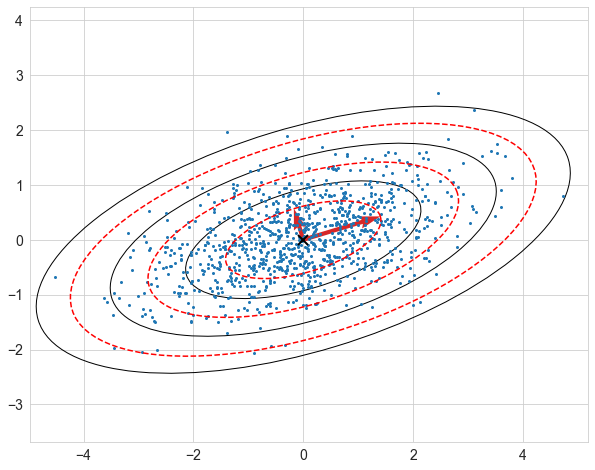

In [27]:
draw_data(Points, mu, cov)

---

## Условное математическое ожидание

1. **Вопрос:** Как связаны плотность условного распределения и сечение плотности совместного распределения? \
   **Ответ:** Плотность условного распределения является сечением плотности совместного распределения, отнормированным на соответствующее значение частного распределения.

In [12]:
# pyx_section = np.empty_like(x_var)
# evidence = univariate_normal(y_condition, mean[1], Sigma_22)
# print(evidence)
# for i, x_i in enumerate(x_var):
#     xy_i = np.reshape([x_i, y_condition], (2, 1))
#     pyx_section[i] = 1./evidence * multivariate_normal(xy_i, d, mean_y, cov)